In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from thefuzz import fuzz, process
import itertools
from itertools import combinations
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.font_manager as fm
from collections import Counter
from matplotlib import dates as mpl_dates
from matplotlib.animation import FuncAnimation
import random
from mpl_toolkits.mplot3d import Axes3D
from itertools import count
from ipywidgets import interact
import matplotlib.animation as animation
from IPython.display import HTML, Image
from IPython.display import HTML
import csv
import time
from scipy import stats
from statsmodels import robust
from robustbase.stats import mad
import re
import pattern3

In [79]:
df=pd.read_csv('E:/Python_file/Titanic_analysis/Titanic-Dataset.csv')

<Axes: >

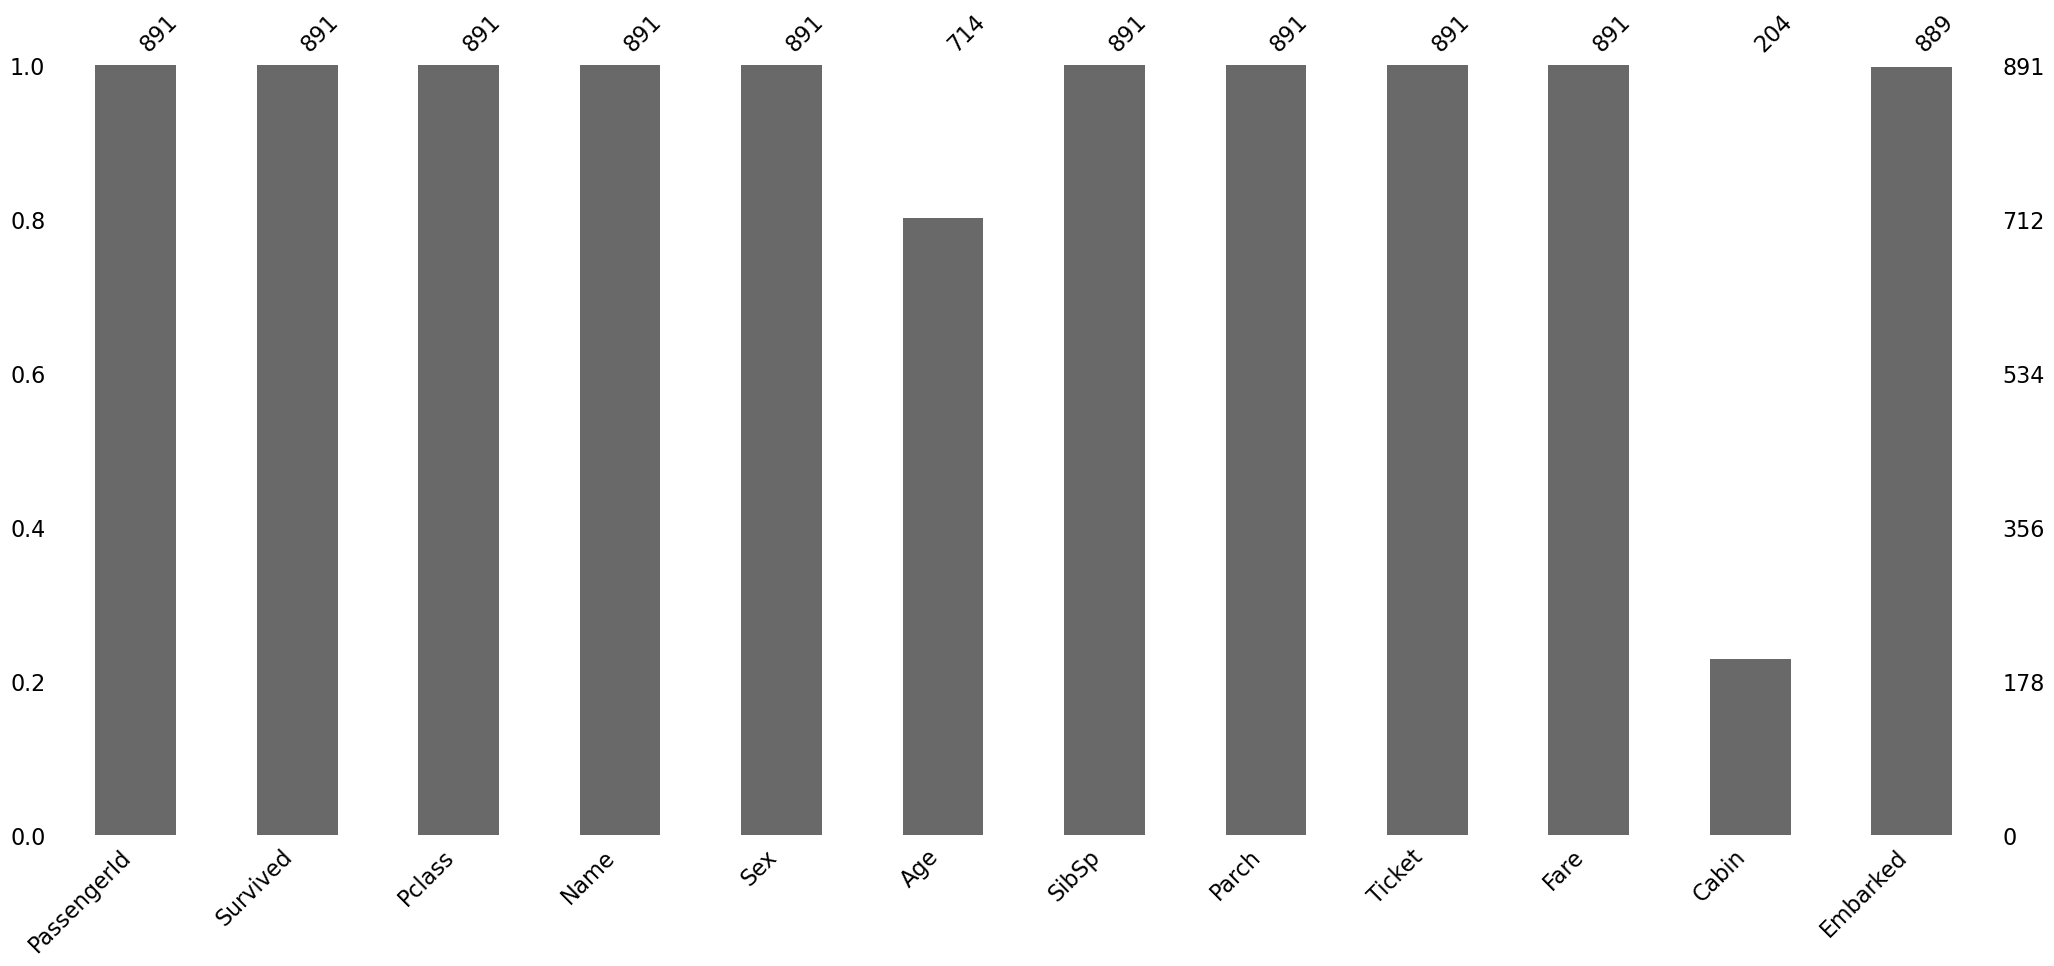

In [80]:
msno.bar(df)

In [147]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Catogorial Variables
- Survived
- Pclass
- Sex
- Embarked
- SibSp
- Parch

## Numerical varables
- Age
- Fare
- PassengerId


#### Mixed Variables
- Ticket
- Cabin
- Name

In [4]:
df.isnull().sum()

## Step-1: Remove NaN value where maximum NaN is present

In [81]:
df.drop(columns={'Cabin'},inplace=True)

## Step-2: Replace missing value by using mean, median as well as mode.

In [82]:
df['Embarked'].fillna('S',inplace=True)

C:\Users\Mamun\AppData\Local\Temp\ipykernel_3116\3895404187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S',inplace=True)


In [83]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Mamun\AppData\Local\Temp\ipykernel_3116\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


## Convert different data to different data types

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [84]:
df['Age']=df['Age'].astype(int)

In [8]:
df[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]=df[['Survived','Pclass','Sex','SibSp','Parch','Embarked']].astype('category')

In [85]:
df_1 = df.copy()

### Data visualization

In [9]:
round(df['Survived'].value_counts().values[0]/891*100)

62

Its about 62% people death by accedient
----------------------------------------------------------------------------------------------------


<Axes: xlabel='Survived', ylabel='count'>

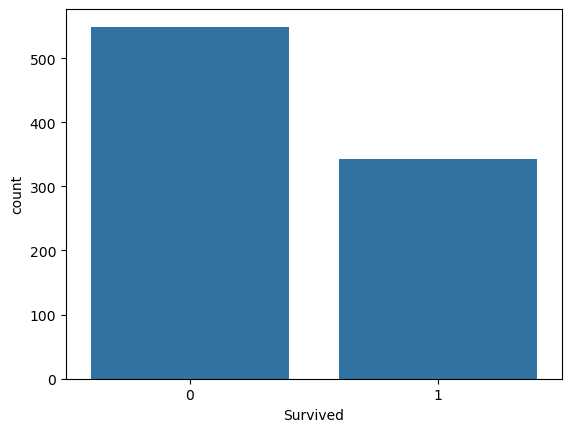

In [10]:
death= round(df['Survived'].value_counts().values[0]/891*100)
print(f"Its about {death}% people death by accedient")
print('-'*100)
sns.countplot(x=df['Survived'])

<Axes: xlabel='Pclass', ylabel='count'>

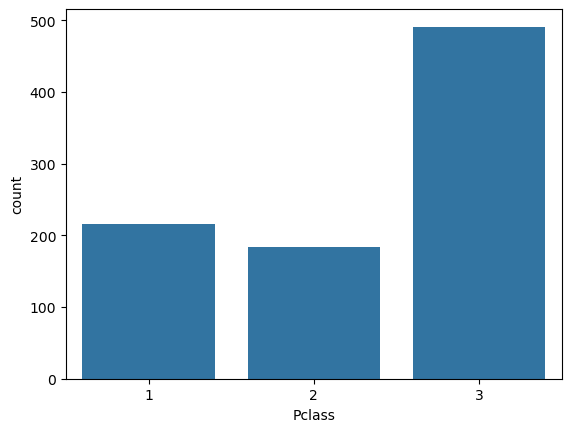

In [11]:
pclass = df['Pclass'].value_counts()/891*100
sns.countplot(x=df['Pclass'],stat='count')

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

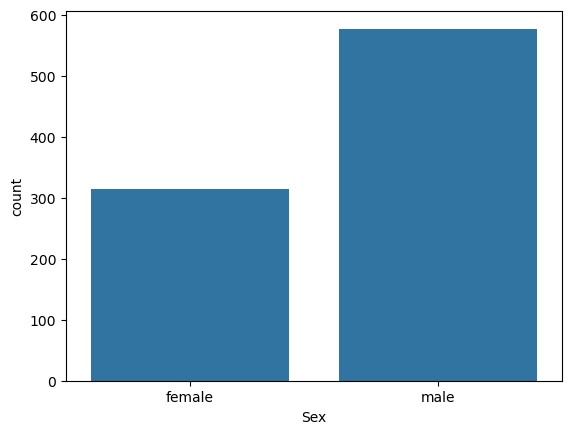

In [12]:
sex = df['Sex'].value_counts()/891*100
print(sex)
sns.countplot(x=df['Sex'],stat='count')

SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: count, dtype: float64


<Axes: xlabel='SibSp', ylabel='count'>

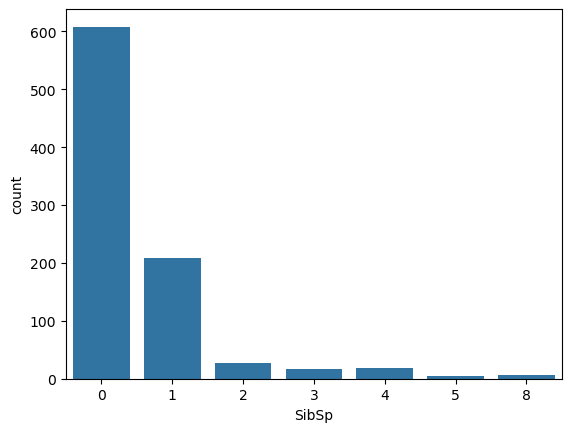

In [13]:
sibsp = df['SibSp'].value_counts()/891*100
print(sibsp)
sns.countplot(x=df['SibSp'],stat='count')

Parch
0    76.094276
1    13.243547
2     8.978676
3     0.561167
5     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

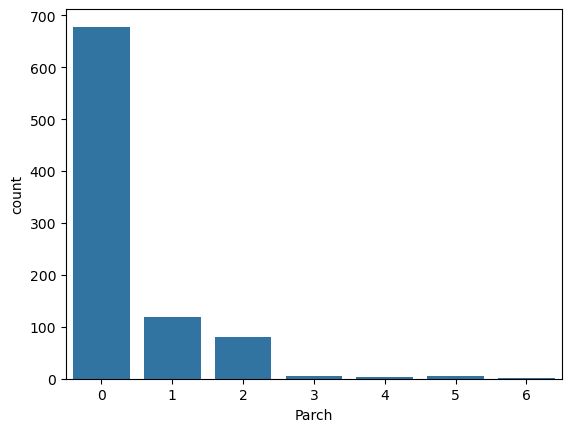

In [14]:
parch = df['Parch'].value_counts()/891*100
print(parch)
sns.countplot(x=df['Parch'],stat='count')

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

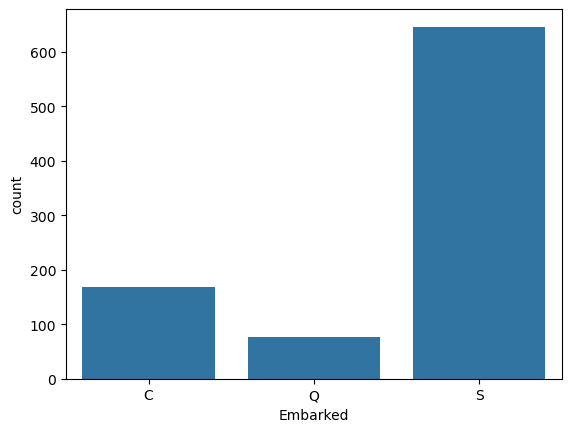

In [20]:
embarked = df['Embarked'].value_counts()/891*100
print(embarked)
sns.countplot(x=df['Embarked'],stat='count')

0.45956263424701577
0.9865867453652877


<Axes: xlabel='Age', ylabel='Density'>

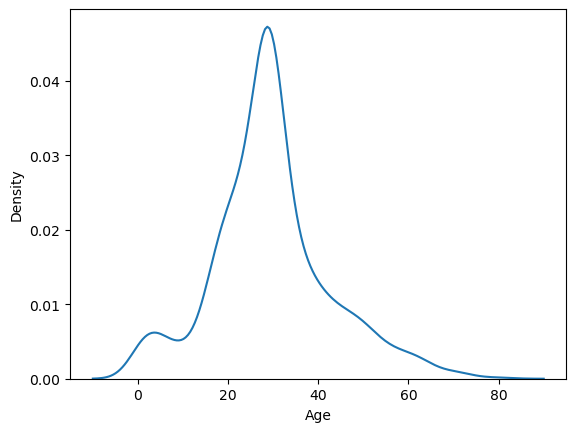

In [21]:
#sns.histplot(df['Age'],kde=True,stat="density")
#sns.distplot(df['Age'],hist=False)
#sns.displot(df['Age'],kind='kde')
print(df['Age'].skew())
print(df['Age'].kurt())
sns.kdeplot(df['Age'])

<Axes: ylabel='Age'>

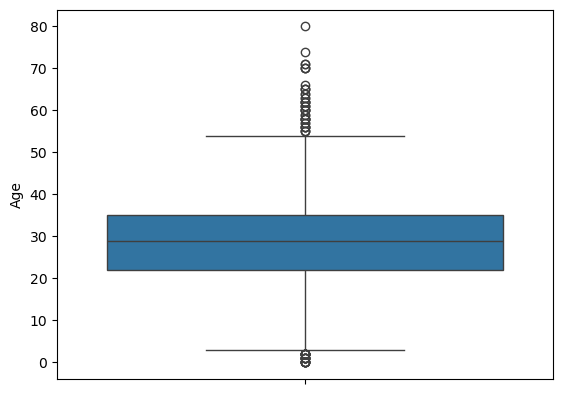

In [22]:
sns.boxplot(df['Age'])

In [15]:
print(f"{(df.loc[((df['Age']>60) & (df['Age']<70))].shape[0])} people are in range")
print('_'*50)
print(f"{(df.loc[((df['Age']>70) & (df['Age']<80))].shape[0])} people are in range")
print('_'*50)
print(f"{(df.loc[((df['Age']>80) & (df['Age']<90))].shape[0])} people are in range")
print('_'*50)
print(f"{(df.loc[((df['Age']>20) & (df['Age']<60))].shape[0])} people are in range")
print('_'*50)
print(f"{(df.loc[df['Age']<1].shape[0])} people are in range")

15 people are in range
__________________________________________________
3 people are in range
__________________________________________________
0 people are in range
__________________________________________________
685 people are in range
__________________________________________________
7 people are in range


## Conclusion 
- Here, we show that skewness range between -0.5 to 0.5 thats why age can be consider as a normal distribution
- depper analysis need to detect outlair

In [42]:
#sns.boxplot(outlair['Age'])

15

4.787316519674893
__________________________________________________
33.39814088089868


<Axes: xlabel='Fare', ylabel='Density'>

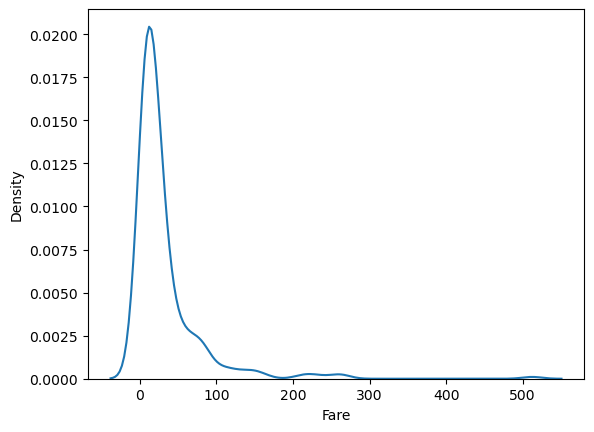

In [16]:
print(df['Fare'].skew())
print('_'*50)
print(df['Fare'].kurt())
sns.kdeplot(df['Fare'])

In [17]:
print(f"People greater than $200 to less than $300 will be {df.loc[(df['Fare']>200) & (df['Fare']<300)].shape[0]}")# First class
print('_'*50)
print(f"People greater than $300 to less than $500 will be {df.loc[(df['Fare']>300) & (df['Fare']<500)].shape[0]}")
print('_'*50)
print(f"People greater $100 to less than $200 will be {df.loc[(df['Fare']>10) & (df['Fare']<200)].shape[0]}") # Second class
print('_'*50)
print(f"People greater than $500 will be {df.loc[(df['Fare']>500)].shape[0]}") # Premium class
print('_'*50)
print(f"People less than $1 will be {df.loc[(df['Fare']<1)].shape[0]}") # Lower class
print("_"*50)

People greater than $200 to less than $300 will be 17
__________________________________________________
People greater than $300 to less than $500 will be 0
__________________________________________________
People greater $100 to less than $200 will be 535
__________________________________________________
People greater than $500 will be 3
__________________________________________________
People less than $1 will be 15
__________________________________________________


<Axes: ylabel='Fare'>

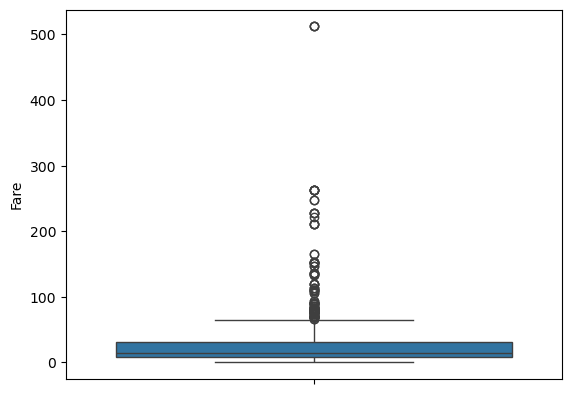

In [90]:
sns.boxplot(df['Fare'])

## Conclusion
- Highly skwed data thats why it does not consider at a normal distribution
- Outiers are present in dataset

## Multivariate analysis

In [18]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Pclass,1,2,3
Survived,,,
0,14.6,17.7,67.8
1,39.8,25.4,34.8


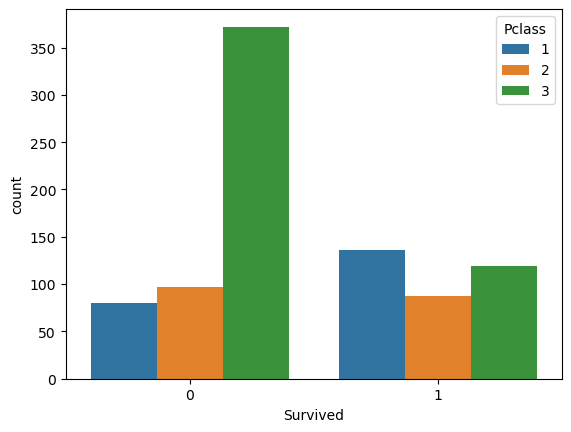

In [19]:
sns.countplot(x=df['Survived'],hue = df['Pclass'])
pd.crosstab(df['Survived'],df['Pclass']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Embarked,C,Q,S
Survived,,,
0,13.7,8.6,77.8
1,27.4,8.8,63.8


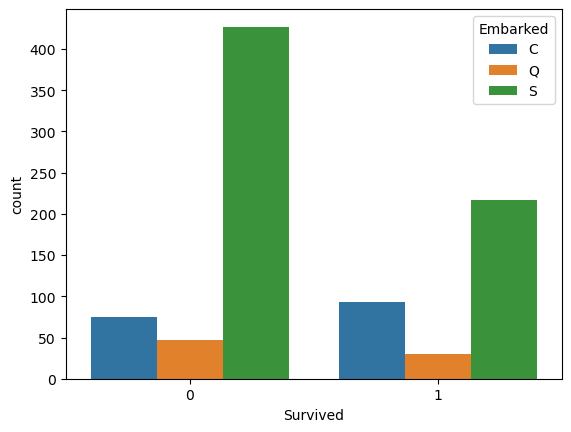

In [20]:
sns.countplot(x=df['Survived'],hue = df['Embarked'])
pd.crosstab(df['Survived'],df['Embarked']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

<Axes: xlabel='Age', ylabel='Density'>

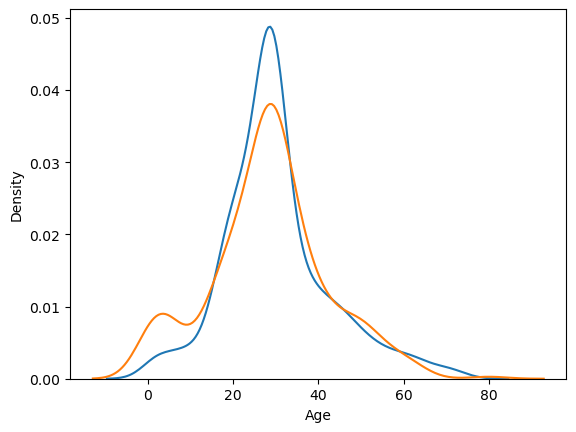

In [21]:
# Survived with Age
#sns.distplot(df[df['Survived']==0]['Age'])
#sns.distplot(df[df['Survived']==1]['Age'])
sns.kdeplot(df[df['Survived']==0]['Age'])
sns.kdeplot(df[df['Survived']==1]['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

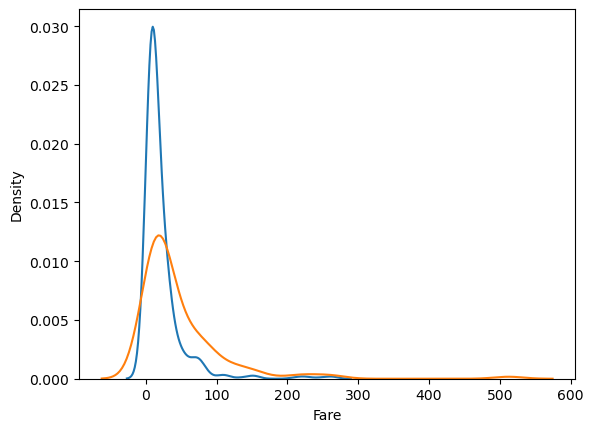

In [22]:
## Survived with Fare
sns.kdeplot(df[df['Survived']==0]['Fare'])
sns.kdeplot(df[df['Survived']==1]['Fare'])

### Total Plot

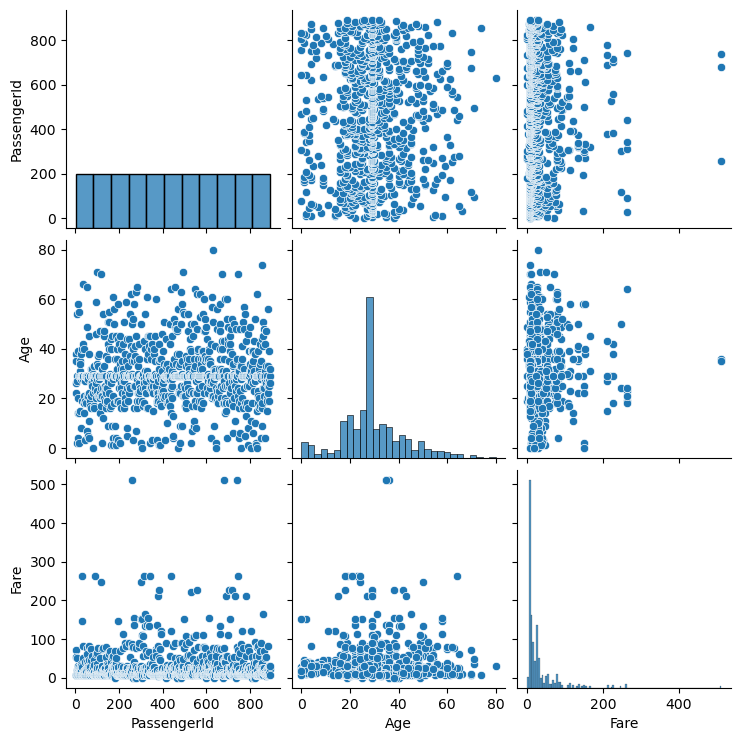

In [23]:
sns.pairplot(df)

In [159]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [24]:
df.drop(columns={'PassengerId','Name','Ticket','Sex','Embarked'},inplace=True)

<Axes: >

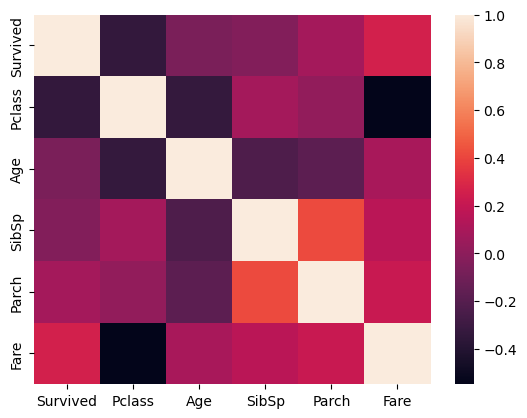

In [25]:
sns.heatmap(df.corr())

In [26]:
def family_type(number):
    if number==0:
        return 'Alone'
    elif number>0 & number<4:
        return 'Medium'
    elif number>4:
        return 'Large'

In [27]:
df['Family_type'] = df['SibSp'].astype(int)+df['Parch'].astype(int)

In [28]:
df['Family_type']=df['Family_type'].apply(family_type)

In [29]:
df['Family_type']=df['Family_type'].astype('category')

In [30]:
pd.crosstab(df['Survived'],df['Family_type']).apply(lambda r: round((r/r.sum()),1)*100,axis=1)

Family_type,Alone,Medium
Survived,,
0,70.0,30.0
1,50.0,50.0


In [31]:
df.drop(columns=['SibSp','Parch'],inplace=True)

## Detecting outlier
- if data is following normal distribution, anything beyond 3SD-mean+3SD can be considered as an outlier
- if data does not following normal distribution, using boxplot we can eliminate points beyond Q1-1.5IQR and Q3+1.5IQR
## Categorical data
- if col is highly imbalanced for eg. male 10000 and female is 4 then we can eliminate female

## handling outliers (Almost normal distribution)

In [35]:
df_age = df[df["Age"]<(df['Age'].mean()+3*df['Age'].std())]

<Axes: ylabel='Age'>

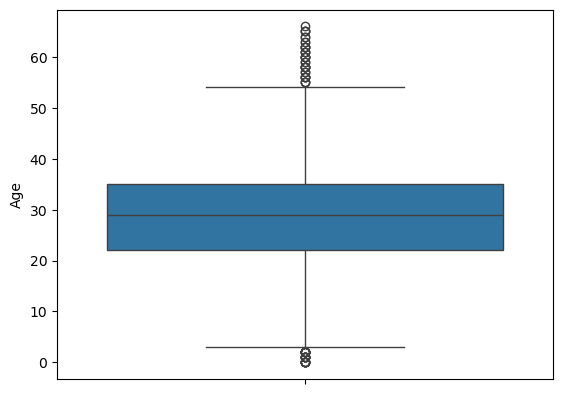

In [42]:
sns.boxplot(df_age['Age'])

## handling outliers (Not normal distribution)

In [50]:
Q1 = np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)

In [51]:
outlier_low = Q1-1.5*(Q3-Q1)
outlier_high = Q3+1.5*(Q3-Q1)

In [61]:
df_fare= df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

<Axes: ylabel='Fare'>

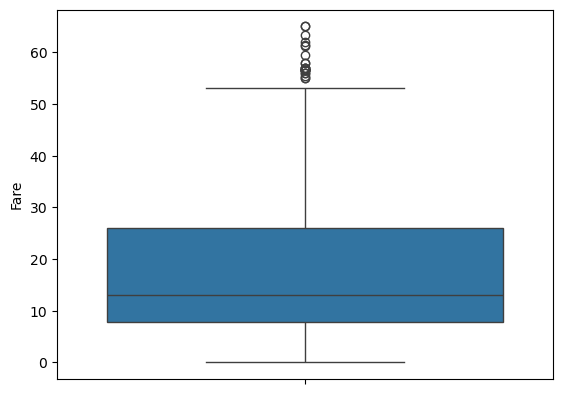

In [62]:
sns.boxplot(df_fare['Fare'])

In [74]:
encoding=pd.get_dummies(df_fare, columns=['Pclass','Family_type'],dtype=int)

<Axes: >

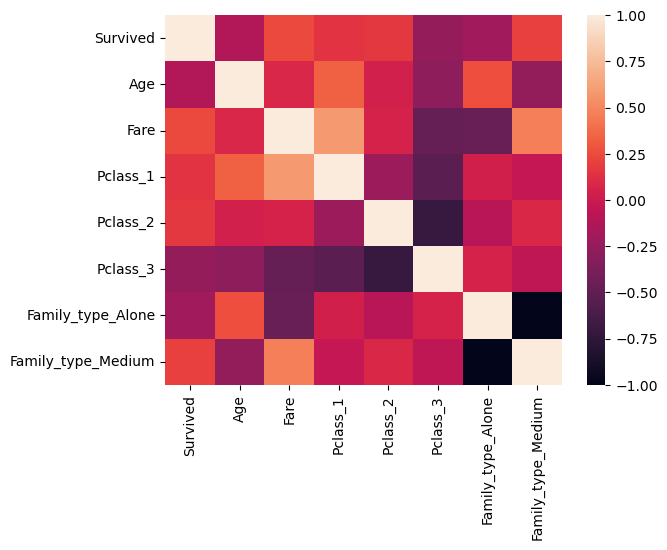

In [77]:
sns.heatmap(encoding.corr())

## Drawing conclusion
- Chance of female survival is higher than male survival
- Travelling in class 3 was deadlist
- Somehow people going to C survived more.
- People in the age range 20 to 40 had a higher chance of not surviving
- People travelling with samller family had a higher chance of surviving than alone

In [175]:
df_1['Name_Mr']=df_1['Name'].str.extract(r'([a-zA-Z]+[,]+\s[Mr]+[.]+\s\w+\s\w+)')

In [179]:
mr= df_1.dropna(subset='Name_Mr')

<Axes: xlabel='Survived', ylabel='count'>

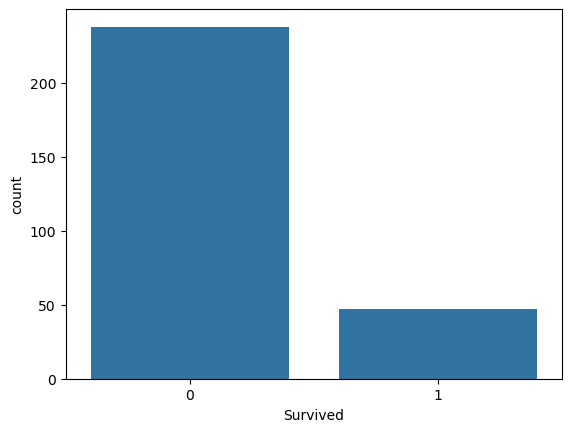

In [181]:
sns.countplot(x=mr['Survived'])

In [203]:
df_1['Name_Mrs']=df_1['Name'].str.extract(r'([a-zA-Z]+[,]+\sMrs+[.]+\s\w+\s\w+)')

In [204]:
mrs= df_1.dropna(subset='Name_Mrs')

In [211]:
mrs.shape[0]

64

<Axes: xlabel='Survived', ylabel='count'>

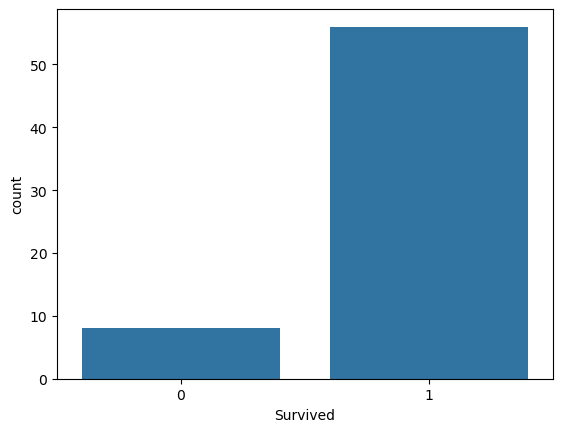

In [206]:
sns.countplot(x=mrs['Survived'])

In [207]:
df_1['Name_Miss']=df_1['Name'].str.extract(r'([a-zA-Z]+[,]+\sMiss+[.]+\s\w+\s\w+)')
miss= df_1.dropna(subset='Name_Miss')

<Axes: xlabel='Survived', ylabel='count'>

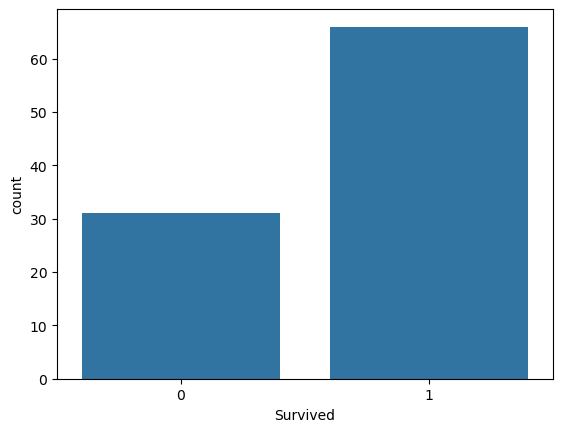

In [209]:
sns.countplot(x=miss['Survived'])

<Axes: xlabel='Survived', ylabel='count'>

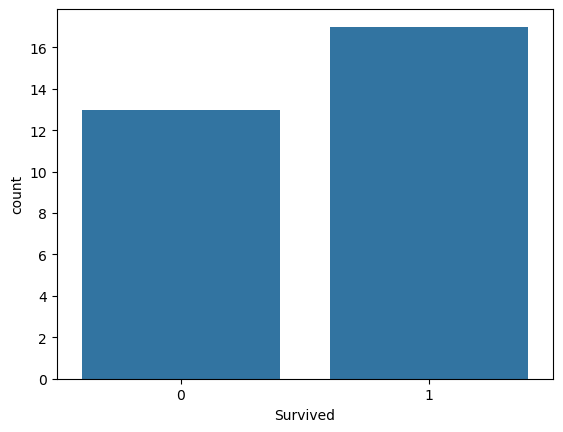

In [210]:
df_1['Name_Master']=df_1['Name'].str.extract(r'([a-zA-Z]+[,]+\sMaster+[.]+\s\w+\s\w+)')
master= df_1.dropna(subset='Name_Master')
sns.countplot(x=master['Survived'])

In [214]:
mr.shape[0]+mrs.shape[0]+miss.shape[0]+master.shape[0]

476

In [264]:
df_1=df_1[~df_1['Name'].isin(mr['Name'])]

In [265]:
df_1=df_1[~df_1['Name'].isin(mrs['Name'])]

In [266]:
df_1=df_1[~df_1['Name'].isin(miss['Name'])]

In [268]:
df_1=df_1[~df_1['Name'].isin(master['Name'])]

<Axes: xlabel='Survived', ylabel='count'>

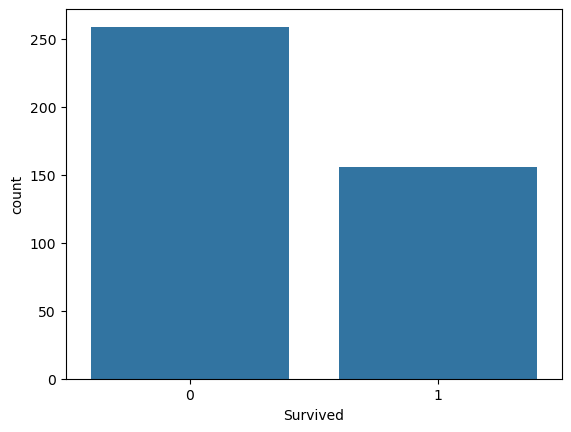

In [270]:
sns.countplot(x=df_1['Survived'])